In [ ]:
import os
import zipfile

In [ ]:
!unzip -q "/content/drive/My Drive/fff/hackerearth.zip"

In [ ]:
os.getcwd() 
os.chdir('/content/dataset')
!ls

test  test.csv	train  train.csv


In [ ]:
!mkdir(abc)

/bin/bash: -c: line 0: syntax error near unexpected token `abc'
/bin/bash: -c: line 0: `mkdir(abc)'


In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

Using TensorFlow backend.


In [2]:
train=pd.read_csv('train.csv')

In [ ]:
train.head()

,Image,target,pixels
0,96.jpg,manipuri,NaN
1,163.jpg,bharatanatyam,NaN
2,450.jpg,odissi,NaN
3,219.jpg,kathakali,NaN
4,455.jpg,odissi,NaN


In [ ]:
from keras.applications.inception_v3 import preprocess_input
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('sample_data/train/'+train['Image'][i], target_size=(224,224,3), grayscale=False)
    img = image.img_to_array(img)
    img=preprocess_input(img)
    train_image.append(img)
X = np.array(train_image)
#X=train_image

100%|██████████| 364/364 [00:02<00:00, 145.34it/s]


In [20]:
#y=train['target'].values
y=train['target']


In [21]:
from sklearn.preprocessing import LabelEncoder
ld=LabelEncoder()
y=ld.fit_transform(y)

In [22]:
y.shape
y=to_categorical(y)

In [ ]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [ ]:
X_test.shape

(73, 224, 224, 3)

In [5]:

# import the libraries as shown below
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout,BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
#from tensorflow.keras.applications.nasnet import NasNetLarge


from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
#from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [115]:
resnet = ResNet50(input_shape=[224,224]+ [3], weights='imagenet', include_top=False)
vgg= VGG16(input_shape=[224,224]+ [3], weights='imagenet', include_top=False)
inception=InceptionV3(input_shape=[224,224]+ [3], weights='imagenet', include_top=False)
xception=Xception(input_shape=[300,300]+ [3], weights='imagenet', include_top=False)
inres=InceptionResNetV2(input_shape=[224,224]+ [3], weights='imagenet', include_top=False)
vgg19=VGG19(input_shape=[224,224]+ [3], weights='imagenet', include_top=False)
nnl=tf.keras.applications.NASNetLarge(input_shape=(331,331,3),  weights='imagenet',include_top=False)
#nnl=NasNetLarge(input_shape=[224,224]+ [3], weights='imagenet', include_top=False)

In [54]:
for layer in resnet.layers:
    layer.trainable = False

In [55]:
for layer in xception.layers:
    layer.trainable = False

In [56]:
for layer in vgg.layers:
    layer.trainable = False

In [57]:
for layer in inception.layers:
    layer.trainable = True

In [58]:
for layer in nnl.layers:
    layer.trainable=True

In [ ]:

# our layers - you can add more if you want
x = Flatten()(inception.output)

In [ ]:

prediction = Dense(8, activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [88]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.60):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True

In [ ]:
callbacks=myCallback()
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test),callbacks=callbacks)

Epoch 1/100
10/10 [==============================] - 5s 485ms/step - loss: 0.3621 - accuracy: 0.9003 - val_loss: 3.5462 - val_accuracy: 0.4795
Epoch 2/100
10/10 [==============================] - 5s 485ms/step - loss: 0.1533 - accuracy: 0.9656 - val_loss: 3.2737 - val_accuracy: 0.4795
Epoch 3/100
10/10 [==============================] - 5s 486ms/step - loss: 0.2735 - accuracy: 0.9347 - val_loss: 3.1847 - val_accuracy: 0.4521
Epoch 4/100
10/10 [==============================] - 5s 485ms/step - loss: 0.7837 - accuracy: 0.8247 - val_loss: 3.6085 - val_accuracy: 0.3699
Epoch 5/100
10/10 [==============================] - 5s 485ms/step - loss: 0.6992 - accuracy: 0.7973 - val_loss: 3.7833 - val_accuracy: 0.3425
Epoch 6/100
10/10 [==============================] - 5s 486ms/step - loss: 1.0399 - accuracy: 0.8351 - val_loss: 4.0710 - val_accuracy: 0.3973
Epoch 7/100
10/10 [==============================] - 5s 487ms/step - loss: 0.8419 - accuracy: 0.8179 - val_loss: 4.0352 - val_accuracy: 0.3014

**IGnore the below code till ###########################**

In [ ]:
vgg16

In [ ]:
from keras.applications.vgg16 import preprocess_input
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('sample_data/train/'+train['Image'][i], target_size=(224,224,3), grayscale=False)
    img = image.img_to_array(img)
    img=preprocess_input(img)
    train_image.append(img)
X = np.array(train_image)
#X=train_image

100%|██████████| 364/364 [00:02<00:00, 156.34it/s]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [ ]:

# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [ ]:

prediction = Dense(8, activation='softmax')(x)

# create a model object
modelvgg = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
modelvgg.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
callbacks=myCallback()
modelvgg.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test),callbacks=callbacks)

Epoch 1/100
10/10 [==============================] - 7s 707ms/step - loss: 2.0739 - accuracy: 0.1443 - val_loss: 2.0917 - val_accuracy: 0.1096
Epoch 2/100
10/10 [==============================] - 7s 705ms/step - loss: 2.0740 - accuracy: 0.1443 - val_loss: 2.0917 - val_accuracy: 0.1096
Epoch 3/100
10/10 [==============================] - 7s 705ms/step - loss: 2.0740 - accuracy: 0.1443 - val_loss: 2.0919 - val_accuracy: 0.1096
Epoch 4/100
10/10 [==============================] - 7s 706ms/step - loss: 2.0739 - accuracy: 0.1443 - val_loss: 2.0921 - val_accuracy: 0.1096
Epoch 5/100
10/10 [==============================] - 7s 705ms/step - loss: 2.0739 - accuracy: 0.1443 - val_loss: 2.0920 - val_accuracy: 0.1096
Epoch 6/100
10/10 [==============================] - 7s 704ms/step - loss: 2.0740 - accuracy: 0.1443 - val_loss: 2.0921 - val_accuracy: 0.1096
Epoch 7/100
10/10 [==============================] - 7s 706ms/step - loss: 2.0739 - accuracy: 0.1443 - val_loss: 2.0922 - val_accuracy: 0.1096

KeyboardInterrupt: ignored

In [ ]:
resnet

In [ ]:
from keras.applications.resnet50 import preprocess_input
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('sample_data/train/'+train['Image'][i], target_size=(224,224,3), grayscale=False)
    img = image.img_to_array(img)
    img=preprocess_input(img)
    train_image.append(img)
X = np.array(train_image)
#X=train_image

100%|██████████| 364/364 [00:02<00:00, 159.76it/s]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [ ]:

# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [ ]:

prediction = Dense(8, activation='softmax')(x)

# create a model object
modelresnet = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
modelresnet.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
callbacks=myCallback()
modelresnet.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test),callbacks=callbacks)

Epoch 1/100
10/10 [==============================] - 6s 578ms/step - loss: 1.3854 - accuracy: 0.9244 - val_loss: 25.6006 - val_accuracy: 0.3151
Epoch 2/100
10/10 [==============================] - 6s 579ms/step - loss: 1.3318 - accuracy: 0.9003 - val_loss: 30.2771 - val_accuracy: 0.3425
Epoch 3/100
10/10 [==============================] - 6s 579ms/step - loss: 0.3224 - accuracy: 0.9210 - val_loss: 34.9747 - val_accuracy: 0.3699
Epoch 4/100
10/10 [==============================] - 6s 577ms/step - loss: 0.3144 - accuracy: 0.9622 - val_loss: 39.7391 - val_accuracy: 0.3562
Epoch 5/100
10/10 [==============================] - 6s 579ms/step - loss: 0.4191 - accuracy: 0.9244 - val_loss: 49.4051 - val_accuracy: 0.3699
Epoch 6/100
10/10 [==============================] - 6s 578ms/step - loss: 0.2478 - accuracy: 0.9450 - val_loss: 32.5208 - val_accuracy: 0.3288
Epoch 7/100
10/10 [==============================] - 6s 578ms/step - loss: 0.1996 - accuracy: 0.9759 - val_loss: 22.2512 - val_accuracy:

In [ ]:
xception

In [128]:
from keras.applications.xception import preprocess_input
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('sample_data/train/'+train['Image'][i], target_size=(300,300,3), grayscale=False)
    img = image.img_to_array(img)
    img=preprocess_input(img)
    train_image.append(img)
X = np.array(train_image)
#X=train_image

100%|██████████| 364/364 [00:02<00:00, 153.29it/s]


In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [130]:

# our layers - you can add more if you want
x = Flatten()(xception.output)

In [132]:

x=Dense(,activation='relu')(x)

prediction = Dense(8, activation='softmax')(x)

# create a model object
modelxception = Model(inputs=xception.input, outputs=prediction)

ResourceExhaustedError: ignored

In [ ]:
modelxception.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
callbacks=myCallback()
modelxception.fit(X_train, y_train,steps_per_epoch=100, epochs=50, validation_data=(X_test, y_test),callbacks=callbacks)

In [ ]:
inceptionresnetv2

In [ ]:
from keras.applications.inception_resnet_v2 import preprocess_input
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('sample_data/train/'+train['Image'][i], target_size=(224,224,3), grayscale=False)
    img = image.img_to_array(img)
    img=preprocess_input(img)
    train_image.append(img)
X = np.array(train_image)
#X=train_image

100%|██████████| 364/364 [00:02<00:00, 161.59it/s]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [ ]:

# our layers - you can add more if you want
x = Flatten()(inres.output)

In [ ]:

prediction = Dense(8, activation='softmax')(x)

# create a model object
modelinres = Model(inputs=inres.input, outputs=prediction)

In [ ]:
modelinres.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
callbacks=myCallback()
modelinres.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test),callbacks=callbacks)

Epoch 1/200
10/10 [==============================] - 11s 1s/step - loss: 0.5244 - accuracy: 0.8900 - val_loss: 18.3641 - val_accuracy: 0.3699
Epoch 2/200
10/10 [==============================] - 11s 1s/step - loss: 0.4610 - accuracy: 0.8625 - val_loss: 10.1807 - val_accuracy: 0.4110
Epoch 3/200
10/10 [==============================] - 11s 1s/step - loss: 0.7927 - accuracy: 0.8797 - val_loss: 5.2122 - val_accuracy: 0.4658
Epoch 4/200
10/10 [==============================] - 11s 1s/step - loss: 1.2868 - accuracy: 0.8591 - val_loss: 3.1806 - val_accuracy: 0.4384
Epoch 5/200
10/10 [==============================] - 11s 1s/step - loss: 0.3079 - accuracy: 0.9347 - val_loss: 2.1985 - val_accuracy: 0.5342
Epoch 6/200
10/10 [==============================] - 11s 1s/step - loss: 1.1868 - accuracy: 0.9038 - val_loss: 10.9529 - val_accuracy: 0.4384
Epoch 7/200
10/10 [==============================] - 11s 1s/step - loss: 4.6331 - accuracy: 0.6701 - val_loss: 7.4354 - val_accuracy: 0.1918
Epoch 8/20

KeyboardInterrupt: ignored

In [ ]:
nasnetlarge

In [42]:
from keras.applications.nasnet import preprocess_input
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('sample_data/train/'+train['Image'][i], target_size=(331,331,3), grayscale=False)
    img = image.img_to_array(img)
    img=preprocess_input(img)
    train_image.append(img)
X = np.array(train_image)
#X=train_image

100%|██████████| 364/364 [00:02<00:00, 144.82it/s]


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [44]:

# our layers - you can add more if you want
x = Flatten()(nnl.output)

In [45]:

prediction = Dense(8, activation='softmax')(x)

# create a model object
modelnnl = Model(inputs=nnl.input, outputs=prediction)

In [46]:
modelnnl.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [51]:
callbacks=myCallback()
modelnnl.fit(X_train, y_train,steps_per_epoch=80, epochs=100, validation_data=(X_test, y_test),callbacks=callbacks)

Epoch 1/100
80/80 [==============================] - 113s 1s/step - loss: 2.0957 - accuracy: 0.2132 - val_loss: 19968909276872704.0000 - val_accuracy: 0.0959
Epoch 2/100
80/80 [==============================] - 114s 1s/step - loss: 1.9703 - accuracy: 0.2320 - val_loss: 36737438973952.0000 - val_accuracy: 0.0959
Epoch 3/100
80/80 [==============================] - 113s 1s/step - loss: 1.8126 - accuracy: 0.3009 - val_loss: 933956157440.0000 - val_accuracy: 0.0959
Epoch 4/100
74/80 [==========================>...] - ETA: 8s - loss: 1.6413 - accuracy: 0.3864

KeyboardInterrupt: ignored

In [98]:
test = pd.read_csv('test.csv')
test.head()

,Image,Output
0,508.jpg,NaN
1,246.jpg,NaN
2,473.jpg,NaN
3,485.jpg,NaN
4,128.jpg,NaN


In [99]:
from keras.applications.inception_resnet_v2 import preprocess_input

test_image = []
for i in tqdm(range(test.shape[0])):
    img = image.load_img('sample_data/test/'+test['Image'][i], target_size=(400,400,3), grayscale=False)
    img = image.img_to_array(img)
    img = preprocess_input(img)
    test_image.append(img)
test = np.array(test_image)

100%|██████████| 156/156 [00:01<00:00, 133.72it/s]


In [100]:
prediction = modelxception.predict(test)

In [101]:
prediction=np.argmax(prediction,axis=1)

In [102]:
prediction=ld.inverse_transform(prediction)

In [103]:
prediction

array(['kuchipudi', 'bharatanatyam', 'odissi', 'odissi', 'mohiniyattam',
       'kuchipudi', 'kuchipudi', 'kathak', 'bharatanatyam', 'odissi',
       'bharatanatyam', 'bharatanatyam', 'manipuri', 'sattriya',
       'sattriya', 'bharatanatyam', 'bharatanatyam', 'bharatanatyam',
       'mohiniyattam', 'kuchipudi', 'odissi', 'kathakali', 'kathakali',
       'bharatanatyam', 'mohiniyattam', 'kathakali', 'kathak',
       'mohiniyattam', 'odissi', 'bharatanatyam', 'kathak',
       'mohiniyattam', 'sattriya', 'bharatanatyam', 'mohiniyattam',
       'kuchipudi', 'odissi', 'odissi', 'sattriya', 'sattriya', 'kathak',
       'odissi', 'sattriya', 'sattriya', 'sattriya', 'sattriya',
       'sattriya', 'sattriya', 'kathakali', 'kathakali', 'mohiniyattam',
       'kuchipudi', 'kathak', 'bharatanatyam', 'kathak', 'kathak',
       'kathak', 'odissi', 'kathak', 'manipuri', 'kathakali', 'manipuri',
       'sattriya', 'kuchipudi', 'sattriya', 'kuchipudi', 'kathakali',
       'odissi', 'bharatanatyam', 'o

In [104]:
test=pd.read_csv('test.csv')
test.head()

,Image,Output
0,508.jpg,NaN
1,246.jpg,NaN
2,473.jpg,NaN
3,485.jpg,NaN
4,128.jpg,NaN


In [105]:
p=pd.DataFrame(prediction,columns=['target'])

In [106]:
n=pd.concat([test,p],axis=1)


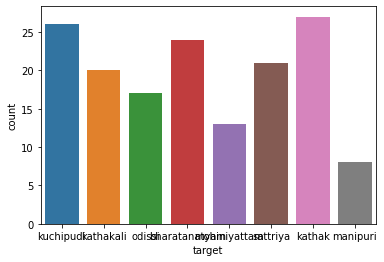

In [ ]:
import seaborn as sns
sns.countplot(x='target',data=n)

In [ ]:
n

,Image,target
0,508.jpg,kuchipudi
1,246.jpg,kathakali
2,473.jpg,kuchipudi
3,485.jpg,odissi
4,128.jpg,bharatanatyam
...,...,...
151,366.jpg,sattriya
152,226.jpg,kathakali
153,35.jpg,bharatanatyam
154,458.jpg,odissi


In [107]:
n.to_csv('deep7.csv',index=False)

In [ ]:
y_train

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

**###############################**

In [ ]:

train_datagen=ImageDataGenerator(rescale = 1./255,
                                 rotation_range=40,
                                 width_shift_range=0.10,
                                 height_shift_range=0.10,
                                 zoom_range = 0.2,
                                 horizontal_flip = True,
                                 
                                   )
validation_datagen=ImageDataGenerator(rescale = 1./255)

In [ ]:
train_datagen.fit(X_train)
validation_datagen.fit(X_test)

In [ ]:
X_train=np.array(X_train)
X_test=np.array(X_test)

In [ ]:
train_gen=train_datagen.flow(
    X_train,
    y=y_train,
    batch_size=16,
    shuffle=True,
    save_to_dir='hello'
    )

In [ ]:
val_gen=validation_datagen.flow(
    X_test,
    y=y_test,
    batch_size=16,
    shuffle=True,
    )

In [ ]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [ ]:
reduce_lr=ReduceLROnPlateau(monitor='val_loss',
                            factor=0.2,
                            patience=3,
                            verbose=1,
                            min_delta=0.00001)

In [ ]:
callbacks=[reduce_lr]

In [ ]:
model.fit(train_gen,validation_data=val_gen,
  epochs=50,
  steps_per_epoch=len(train_gen),
  validation_steps=len(val_gen))

Epoch 1/50
16/16 [==============================] - 8s 486ms/step - loss: 2.8563 - accuracy: 0.1152 - val_loss: 4.6689 - val_accuracy: 0.0744
Epoch 2/50
16/16 [==============================] - 8s 474ms/step - loss: 2.8374 - accuracy: 0.1070 - val_loss: 3.6955 - val_accuracy: 0.1074
Epoch 3/50
16/16 [==============================] - 8s 471ms/step - loss: 2.8666 - accuracy: 0.1317 - val_loss: 2.9334 - val_accuracy: 0.1074
Epoch 4/50
16/16 [==============================] - 8s 478ms/step - loss: 2.7618 - accuracy: 0.1358 - val_loss: 2.6554 - val_accuracy: 0.1074
Epoch 5/50
16/16 [==============================] - 7s 469ms/step - loss: 2.7557 - accuracy: 0.1564 - val_loss: 2.4287 - val_accuracy: 0.1074
Epoch 6/50
16/16 [==============================] - 8s 472ms/step - loss: 2.7345 - accuracy: 0.1111 - val_loss: 2.2295 - val_accuracy: 0.1074
Epoch 7/50
15/16 [===========================>..] - ETA: 0s - loss: 2.6254 - accuracy: 0.1189

KeyboardInterrupt: ignored

In [ ]:
model.fit_generator(
        train_gen,
  validation_data=val_gen,
  epochs=30,
  verbose=2,
  callbacks=callbacks
        )

Epoch 1/30
16/16 - 10s - loss: 2.7452 - accuracy: 0.1646 - val_loss: 8.8942 - val_accuracy: 0.1157 - lr: 0.0010
Epoch 2/30
16/16 - 8s - loss: 2.5185 - accuracy: 0.2099 - val_loss: 19.2108 - val_accuracy: 0.1736 - lr: 0.0010
Epoch 3/30
16/16 - 8s - loss: 2.3951 - accuracy: 0.2263 - val_loss: 24.4998 - val_accuracy: 0.1074 - lr: 0.0010
Epoch 4/30

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
16/16 - 8s - loss: 2.6575 - accuracy: 0.1440 - val_loss: 257.3706 - val_accuracy: 0.1322 - lr: 0.0010
Epoch 5/30
16/16 - 8s - loss: 2.4626 - accuracy: 0.1687 - val_loss: 119.3581 - val_accuracy: 0.1074 - lr: 2.0000e-04
Epoch 6/30


KeyboardInterrupt: ignored